In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
#%matplotlib inline

## Fonctions utilitaires

In [6]:
def linear_correlation(X, Y):
    X_mean = np.mean(X, axis=0)
    Y_mean = np.mean(Y, axis=0)
    cov_X_Y = (X - X_mean).T @ (Y - Y_mean)
    std_X = np.sqrt((X - X_mean).T @ (X - X_mean))
    std_Y = np.sqrt((Y - Y_mean).T @ (Y - Y_mean))
    return np.divide(cov_X_Y, np.multiply(std_X, std_Y))

In [33]:
def p_Student(df, percentage, one_side=True):
    p_values = stats.t.interval(alpha=1 - percentage, df=df, loc=0, scale=1)
    if one_side:
        return 2 * p_values[-1]
    else:
        return p_values[-1]

In [27]:
df = 2.74
stats.t.interval(alpha=1 - 0.05, df=8, loc=0, scale=1)
p_Student(8, 0.05, False)

(-2.3060041350333704, 2.3060041350333704)

### C1EX1
Calcul d'un coefficient de correlation

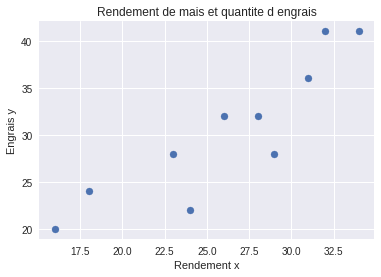

Correlation :  0.892901420659809


In [7]:
X = np.array([16, 18, 23, 24, 28, 29, 26, 31, 32, 34]).reshape(-1, 1)
y = np.array([20, 24, 28, 22, 32, 28, 32, 36, 41, 41]).reshape(-1, 1)
#sns.lmplot("Rendement x", "Engrais y", data=np.concatenate((X, y), axis=1))
plt.scatter(X, y)
plt.xlabel('Rendement x')
plt.ylabel('Engrais y')
plt.title("Rendement de mais et quantite d engrais")
plt.show()
# np.corrcoef(X.ravel(), y.ravel())
corr = np.float(linear_correlation(X, y))
print("Correlation : ", corr)

In [36]:
print("H0: correlation = 0")
t_star = np.divide(np.abs(corr), np.sqrt(np.divide(1 - np.power(corr, 2), X.shape[0] - 2)))

# 2: X theta + b (d=2)
# student à 10 - 2 = 8 degres de liberte
p = p_Student(8, 0.05, False)
print("t_star : {}, p : {}, H0 rejected :{}".format(t_star, p, t_star > p))
print("On rejette H0, la correlation est significativement differente de 0")

H0: correlation = 0
t_star : 5.609093169337708, p : 2.3060041350333704, H0 rejected :True
On rejette H0, la correlation est significativement differente de 0


### C2EX1
Génération d'une consommation aleatoire

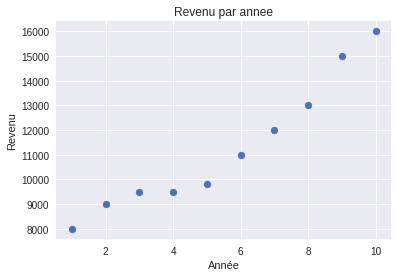

In [64]:
X = np.array(range(1, 11)).reshape(-1, 1)
Y = np.array([8, 9, 9.5, 9.5, 9.8, 11, 12, 13, 15, 16]).reshape(-1, 1) * 1000

C = 1000.0 + 0.8 * Y
plt.scatter(X, Y)
plt.xlabel('Année')
plt.ylabel('Revenu')
plt.title("Revenu par annee")

plt.show()

In [79]:
df_conso = pd.DataFrame(np.concatenate([X, Y, C], axis=1), columns=['Annee', 'Revenu', 'Consommation_th'])
df_conso.index = df_conso.Annee
df_conso

,Annee,Revenu,Consommation_th
Annee,,,
1.0,1.0,8000.0,7400.0
2.0,2.0,9000.0,8200.0
3.0,3.0,9500.0,8600.0
4.0,4.0,9500.0,8600.0
5.0,5.0,9800.0,8840.0
6.0,6.0,11000.0,9800.0
7.0,7.0,12000.0,10600.0
8.0,8.0,13000.0,11400.0
9.0,9.0,15000.0,13000.0


In [99]:
epsilon = np.random.normal(scale = np.sqrt(20000), size=C.shape)
df_conso["Alea"] = epsilon
df_conso["Conso_observee"] = df_conso.Consommation_th + df_conso.Alea
df_conso

,Annee,Revenu,Consommation_th,Alea,Conso_observee
Annee,,,,,
1.0,1.0,8000.0,7400.0,-82.247673,7317.752327
2.0,2.0,9000.0,8200.0,-202.464474,7997.535526
3.0,3.0,9500.0,8600.0,64.558031,8664.558031
4.0,4.0,9500.0,8600.0,-144.590134,8455.409866
5.0,5.0,9800.0,8840.0,-137.882168,8702.117832
6.0,6.0,11000.0,9800.0,173.484514,9973.484514
7.0,7.0,12000.0,10600.0,110.075311,10710.075311
8.0,8.0,13000.0,11400.0,-232.576931,11167.423069
9.0,9.0,15000.0,13000.0,-104.693461,12895.306539


In [102]:
print("Moyenne : {}, Ecart type : {}".format(np.mean(df_conso.Alea), np.std(df_conso.Alea))) 

Moyenne : -49.525941023650844, Ecart type : 133.53297842585005


### C2EX2
Estimation des coefficients de régression